<a href="https://colab.research.google.com/github/Chinhan1532/BT-AI/blob/main/AI_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=097e83373cc2ae3043544800730652df599e9c89e191b85919d3610c86ff0b46
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


150.4432698501278


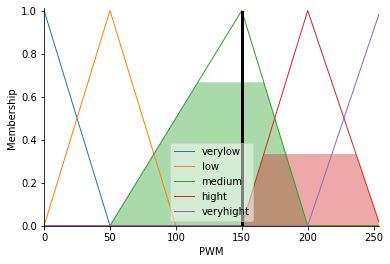

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

setpoint=ctrl.Antecedent(np.arange(18,30,1),'SP')
val_sensor=ctrl.Antecedent(np.arange(-5,60,1),'VS')
pwm=ctrl.Consequent(np.arange(0,255,1),'PWM')

setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['hight']=fuzz.trimf(setpoint.universe,[24,30,30])

val_sensor['verylow']=fuzz.trimf(val_sensor.universe,[-5,-5,30])
val_sensor['low']=fuzz.trimf(val_sensor.universe,[-5,15,30])
val_sensor['medium']=fuzz.trimf(val_sensor.universe,[15,30,45])
val_sensor['hight']=fuzz.trimf(val_sensor.universe,[30,45,60])
val_sensor['veryhight']=fuzz.trimf(val_sensor.universe,[45,60,60])

pwm['verylow']=fuzz.trimf(pwm.universe,[0,0,50])
pwm['low']=fuzz.trimf(pwm.universe,[0,50,100])
pwm['medium']=fuzz.trimf(pwm.universe,[50,150,200])
pwm['hight']=fuzz.trimf(pwm.universe,[150,200,255])
pwm['veryhight']=fuzz.trimf(pwm.universe,[200,255,255])

rule1=ctrl.Rule(setpoint['low']&val_sensor['verylow'],pwm['verylow'])
rule2=ctrl.Rule(setpoint['low']&val_sensor['low'],pwm['verylow'])
rule3=ctrl.Rule(setpoint['low']&val_sensor['medium'],pwm['low'])
rule4=ctrl.Rule(setpoint['low']&val_sensor['hight'],pwm['medium'])
rule5=ctrl.Rule(setpoint['low']&val_sensor['veryhight'],pwm['hight'])
rule6=ctrl.Rule(setpoint['medium']&val_sensor['verylow'],pwm['verylow'])
rule7=ctrl.Rule(setpoint['medium']&val_sensor['low'],pwm['low'])
rule8=ctrl.Rule(setpoint['medium']&val_sensor['medium'],pwm['medium'])
rule9=ctrl.Rule(setpoint['medium']&val_sensor['hight'],pwm['hight'])
rule10=ctrl.Rule(setpoint['medium']&val_sensor['veryhight'],pwm['veryhight'])
rule11=ctrl.Rule(setpoint['hight']&val_sensor['verylow'],pwm['low'])
rule12=ctrl.Rule(setpoint['hight']&val_sensor['low'],pwm['medium'])
rule13=ctrl.Rule(setpoint['hight']&val_sensor['medium'],pwm['medium'])
rule14=ctrl.Rule(setpoint['hight']&val_sensor['hight'],pwm['hight'])
rule15=ctrl.Rule(setpoint['hight']&val_sensor['veryhight'],pwm['veryhight'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['SP']=10.0
tipping.input['VS']=50.0
tipping.compute()
print(tipping.output['PWM'])
pwm.view(sim=tipping)
        

165.4746708602222


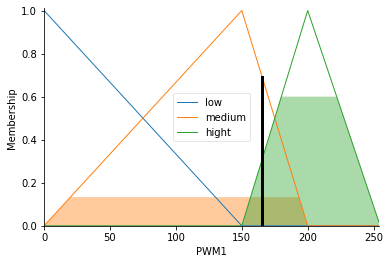

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

sensorL=ctrl.Antecedent(np.arange(0,150,1),'Sensor Left')
sensorC=ctrl.Antecedent(np.arange(0,150,1),'Sensor Center')
sensorR=ctrl.Antecedent(np.arange(0,150,1),'Sensor Right')

sensorLC=ctrl.Consequent(np.arange(0,90,1),'Sensor LC')
sensorRC=ctrl.Consequent(np.arange(0,90,1),'Sensor RC')

pwm1=ctrl.Consequent(np.arange(0,255,1),'PWM1')
pwm2=ctrl.Consequent(np.arange(0,255,1),'PWM2')

sensorL['gan']=fuzz.trimf(sensorL.universe,[0,0,75])
sensorL['tb']=fuzz.trimf(sensorL.universe,[0,75,150])
sensorL['xa']=fuzz.trimf(sensorL.universe,[75,150,150])

sensorC['gan']=fuzz.trimf(sensorC.universe,[0,0,75])
sensorC['tb']=fuzz.trimf(sensorC.universe,[0,75,150])
sensorC['xa']=fuzz.trimf(sensorC.universe,[75,150,150])

sensorR['gan']=fuzz.trimf(sensorR.universe,[0,0,75])
sensorR['tb']=fuzz.trimf(sensorR.universe,[0,75,150])
sensorR['xa']=fuzz.trimf(sensorR.universe,[75,150,150]) 

sensorLC['nho']=fuzz.trimf(sensorLC.universe,[0,0,45])
sensorLC['vua']=fuzz.trimf(sensorLC.universe,[0,45,90])
sensorLC['lon']=fuzz.trimf(sensorLC.universe,[45,90,90]) 

sensorRC['nho']=fuzz.trimf(sensorRC.universe,[0,0,45])
sensorRC['vua']=fuzz.trimf(sensorRC.universe,[0,45,90])
sensorRC['lon']=fuzz.trimf(sensorRC.universe,[45,90,90]) 

pwm1['low']=fuzz.trimf(pwm1.universe,[0,0,150])
pwm1['medium']=fuzz.trimf(pwm1.universe,[0,150,200])
pwm1['hight']=fuzz.trimf(pwm1.universe,[150,200,255])

pwm2['low']=fuzz.trimf(pwm2.universe,[0,0,150])
pwm2['medium']=fuzz.trimf(pwm2.universe,[0,150,200])
pwm2['hight']=fuzz.trimf(pwm2.universe,[150,200,255])

rule1=ctrl.Rule(sensorL['gan']&sensorC['gan'],sensorLC['lon'])
rule2=ctrl.Rule(sensorL['gan']&sensorC['tb'],sensorLC['lon'])
rule3=ctrl.Rule(sensorL['gan']&sensorC['xa'],sensorLC['vua'])
rule4=ctrl.Rule(sensorL['tb']&sensorC['gan'],sensorLC['lon'])
rule5=ctrl.Rule(sensorL['tb']&sensorC['tb'],sensorLC['vua'])
rule6=ctrl.Rule(sensorL['tb']&sensorC['xa'],sensorLC['nho'])
rule7=ctrl.Rule(sensorL['xa']&sensorC['gan'],sensorLC['vua'])
rule8=ctrl.Rule(sensorL['xa']&sensorC['tb'],sensorLC['nho'])
rule9=ctrl.Rule(sensorL['xa']&sensorC['xa'],sensorLC['nho'])

rule10=ctrl.Rule(sensorR['gan']&sensorC['gan'],sensorRC['lon'])
rule11=ctrl.Rule(sensorR['gan']&sensorC['tb'],sensorRC['lon'])
rule12=ctrl.Rule(sensorR['gan']&sensorC['xa'],sensorRC['vua'])
rule13=ctrl.Rule(sensorR['tb']&sensorC['gan'],sensorRC['lon'])
rule14=ctrl.Rule(sensorR['tb']&sensorC['tb'],sensorRC['vua'])
rule15=ctrl.Rule(sensorR['tb']&sensorC['xa'],sensorRC['nho'])
rule16=ctrl.Rule(sensorR['xa']&sensorC['gan'],sensorRC['vua'])
rule17=ctrl.Rule(sensorR['xa']&sensorC['tb'],sensorRC['nho'])
rule18=ctrl.Rule(sensorR['xa']&sensorC['xa'],sensorRC['nho'])

rule19=ctrl.Rule(sensorLC['lon']&sensorRC['lon'],pwm1['hight'])
rule20=ctrl.Rule(sensorLC['lon']&sensorRC['vua'],pwm1['hight'])
rule21=ctrl.Rule(sensorLC['lon']&sensorRC['nho'],pwm1['medium'])
rule22=ctrl.Rule(sensorLC['vua']&sensorRC['lon'],pwm1['hight'])
rule23=ctrl.Rule(sensorLC['vua']&sensorRC['vua'],pwm1['medium'])
rule24=ctrl.Rule(sensorLC['vua']&sensorRC['nho'],pwm1['low'])
rule25=ctrl.Rule(sensorLC['nho']&sensorRC['lon'],pwm1['medium'])
rule26=ctrl.Rule(sensorLC['nho']&sensorRC['vua'],pwm1['low'])
rule27=ctrl.Rule(sensorLC['nho']&sensorRC['nho'],pwm1['low'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Sensor Left']=10.0
tipping.input['Sensor Center']=20.0
tipping.input['Sensor Right']=30.0
tipping.compute()
print(tipping.output['PWM1'])
pwm1.view(sim=tipping)